### CS2101 - Programming for Science and Finance
Prof. Götz Pfeiffer<br />
School of Mathematical and Statistical Sciences<br />
University of Galway

___
# Computer Lab 4
___

## 0. Image Manipulation

In [1]:
import numpy as np
from PIL import Image

In [2]:
# Helper function to display image
def display_image(im: np.ndarray, scale : int = 1) -> Image:
    imageHeight, imageWidth = im.shape[0], im.shape[1]
    return display(Image.fromarray(im).resize((imageHeight*scale, imageWidth*scale)))

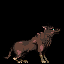

In [3]:
howl = np.asarray(Image.open('howl.ppm'))
display_image(howl)

## 1. Inverting an image

* The first task is to write a function `invert` that takes a value $i$ of type `uint8`and returns $255- i$.
* If we apply this to a colour intensity it will invert the intensity: zero intensity becomes full intensity and vice versa. 

In [4]:
def invert(i : np.uint8) -> np.uint8:
    # Invert the pixel value
    return np.uint8(255 - i)
    

* Test on a value of type `np.uint8`:

In [5]:
invert(np.uint8(100))

np.uint8(155)

* Next you can use the function `invert` to invert all the colour channels of an image.

In [6]:
def invert_image(im: np.ndarray) -> np.ndarray:
    # Create a copy of the image to avoid modifying the original in-place
    inverted_image = im.copy()

    # Iterate over each pixel and channel, apply the invert function
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            inverted_image[i, j, 0] = invert(im[i, j, 0])  # Red channel
            inverted_image[i, j, 1] = invert(im[i, j, 1])  # Green channel
            inverted_image[i, j, 2] = invert(im[i, j, 2])  # Blue channel

    return inverted_image

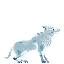

In [7]:
display_image(invert_image(howl))

## 2. Converting an Image to Greyscale

* In this task you will write a function `greyscale` that takes an image and returns a greyscale version of it.
* This is done by letting every pixel have an equal intensity of red, green, and blue in the greyscale.
* That common intensity should be the **average** of the red, green, and blue in the original image.

In [8]:
def average(rgb):
    return np.mean(rgb)

In [9]:
def greyscale(im):
    greyScale = im.copy()

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            greyScale[i][j] = average(im[i, j])

    return greyScale

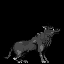

In [10]:
display_image(greyscale(howl))

## 3. Quantizing an image

* If we use `uint8` as the type of the colour intensities, that means that there are $256^3 = 2^{24} = 16777216$ different colours that a pixel can have.
* In this task, you'll write a function that reduces the quality of an image by grouping similar intensities together and giving them a common value.

### Quantizing a single value

* Your first subtask is to write a function `quantize` that takes a `uint8` value and a parameter `bits` that determines how many different 'bins' of values we create.
* For example: if `bits` has the value 6, there should be $2^6 = 64$ bins, and we let the values `0,1,2,3` be grouped together to give the result `0`, the values `4,5,6,7` should all return `4`, and so on.
* If `bits` instead have the value `4`, there should be $2^4 = 16$ bins, and the values `0,1,...,15` should return `0`; the values `16,17,...,31` should all return `16` etc.

In [11]:
def quantize(val : np.uint8, bits : int):# -> Any | int:
    if bits >= 8 or bits <= 0:
        return val
    else:
        numBins = 2 ** bits
        binSize = 256 / numBins
        return  np.uint8((val // binSize) * binSize)

* Test:

In [12]:
print(quantize(17, 4))
print(quantize(17, 6))

16
16


### Quantizing an image

The next task is to write a function `quantize_image` that takes two arguments, the image to quantize, and again a `bits` parameter, that determines how coarsly we quantize the colours in the image.

In [13]:
def quantize_image(im, bits):
    quantizedImage = im.copy()
    # Apply the quantization on each color channel independently using vectorized operations
    quantizedImage[:, :, 0] = quantize(im[:, :, 0], bits)
    quantizedImage[:, :, 1] = quantize(im[:, :, 1], bits)
    quantizedImage[:, :, 2] = quantize(im[:, :, 2], bits)

    return quantizedImage


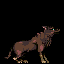

In [14]:
display_image(quantize_image(howl, 4))

## 4. Downsampling/Upsampling

### Upsampling

By upsampling in here we mean that we take an original image, and where each pixel is replaced by a $n \times n$ block of pixels in the new image. Each pixel in the block is identical to the original pixel. 

In [15]:
def upsample(im, n):
    upsampledImage = np.zeros((im.shape[0] * n, im.shape[1] * n, im.shape[2]), dtype=np.uint8)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            upsampledImage[i * n:i * n + n, j * n:j * n + n] = im[i, j]

    return upsampledImage

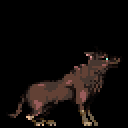

In [16]:
display_image(upsample(howl, 2))

### Downsampling

* When we downsample an image `im`, we divide the image into blocks of size $n \times n$, and compute the average colour intensities in these blocks.
* Each such block then gives rise to a single pixel in ther resulting image.
* Note that first upsampling with a factor `n` and then downsampling with the same factor should return an image identical to the original.
* Whereas first downsampling and then upsampling does not return an identical image.

In [17]:
def downsample(im, n):
    downsampledImage = np.zeros((im.shape[0] // n, im.shape[1] // n, im.shape[2]), dtype=np.uint8)

    for i in range(im.shape[0]  // n ):
        for j in range(im.shape[1] // n ):
            block = im[i * n:(i + 1) * n, j * n:(j + 1) * n]
            meanBlockColour = np.mean(block, axis=(0, 1))

            downsampledImage[i, j] = meanBlockColour
    return downsampledImage
            

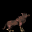

In [18]:
display_image(downsample(howl, 2))

## 5. Noise

* In this last part of the assignment, you will write a function `noisify` to add noise to an image.
* By this we mean that we add a random number to each colour channel of each pixel.
* The call `noisify(im, sigma)` should add a normally distributed random number with mean value 0 and standard deviation `sigma` to each entry in the array representing the image `im`.
* Make sure that:
  1. The result after adding is converted to a `uint8`.
  2. The result is in the interval 0 to 255.

In [19]:
import random
def noisify(im, sigma):
    noiseArray = np.random.normal(0, sigma, im.shape)
    noisyImage = np.clip(im.astype(np.float32) + noiseArray, 0, 255)
    return noisyImage.astype(np.uint8)


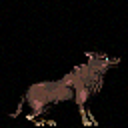

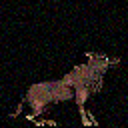

In [20]:
display_image(noisify(howl, 4), scale=2)
display_image(noisify(howl, 16), scale=2)